# $\alpha$-Rational Inattention

## The UCC and IPC




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler


In [2]:
sns.set_style('whitegrid')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import os

# cwdir = %pwd
# fig_dir = os.path.abspath(os.path.join(cwdir, '../figures'))

# The UCC

Considering binary symmetric tracking problem.

In [3]:
def UCC_shannon(u):
    assert all((u >= .5) & (u <= 1)), "EU out of achievable range."
    return u*np.log(u) + (1-u)*np.log(1-u) - np.log(.5)

def UCC_alpha(u, a):
    assert all((u >= .5) & (u <= 1)), "EU out of achievable range."
    return a/(a-1)*np.log(2*(.5*(u**a + (1-u)**a))**(1/a))

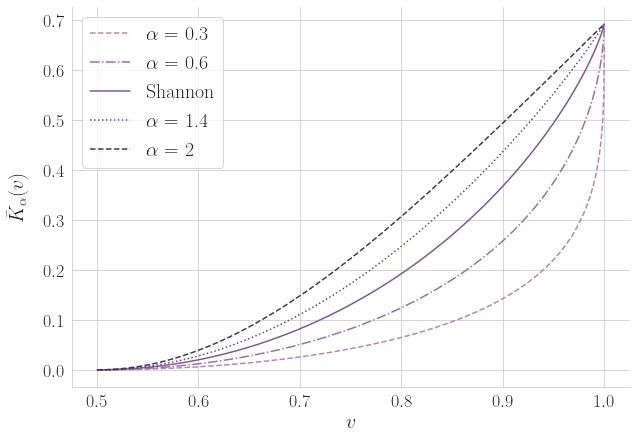

In [4]:
alphas = [.3, .6, 1, 1.4, 2]

u = np.linspace(.5, .99999, 1000)

cstm_cycler = (cycler(color=sns.color_palette("ch:3,r=.2,l=.6")[:5]) + 
               cycler(linestyle=['--', '-.', '-', ':', '--']))

fig, ax = plt.subplots(figsize=(10, 7))

ax.set_prop_cycle(cstm_cycler)
for alpha in alphas:
    if alpha == 1:
        ax.plot(u, UCC_shannon(u), label='Shannon')
    else:
        ax.plot(u, UCC_alpha(u, alpha), label=f'$\\alpha$ = {alpha}')

ax.legend(fontsize=20)
ax.set_xlabel("$v$")
ax.set_ylabel(r"$\bar K_\alpha(v)$", labelpad=15)

sns.despine()
# plt.savefig(os.path.join(fig_dir, 'ucc.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show();

# The IPC

In [5]:
def IPC_shannon(pi):
    return np.exp(pi)/(1 + np.exp(pi))


def IPC_alpha(a, pi_max):
    pi = []
    ipc = []
    
    pi_t = 0
    ipc_t = .5

    pi.append(pi_t)
    ipc.append(ipc_t)
    
    k = 1
    if a < 1:
        while (pi_t < pi_max) & (ipc_t < 1):
            ipc_t += .01
            pi_t = a/(a-1)*(ipc_t**(a-1) - (1-ipc_t)**(a-1))/(ipc_t**a + (1-ipc_t)**a)
            ipc.append(ipc_t)
            pi.append(pi_t)

    else:
        pi_interior = a/(a - 1)
        while (pi_t < (pi_interior - .05)) & (ipc_t < 1):
            ipc_t += .001
            if ipc_t <= 1:
                pi_t = a/(a-1)*(ipc_t**(a-1) - (1-ipc_t)**(a-1))/(ipc_t**a + (1-ipc_t)**a)
                ipc.append(ipc_t)
                pi.append(pi_t)
                k += .1
            else:
                pass

        ipc.append(1)
        pi.append(pi_interior)
        pi_t = pi_max
        ipc.append(1)
        pi.append(pi_max)
    
    return pi, ipc

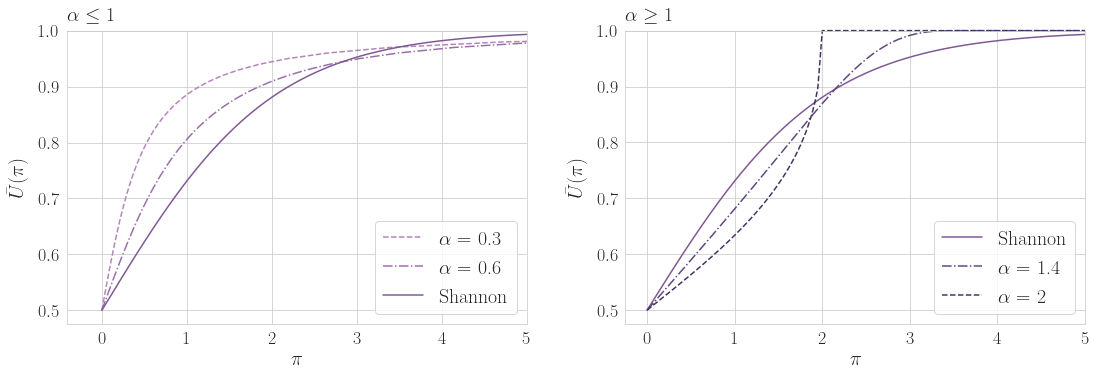

In [6]:
pi = np.linspace(0, 5, 1000)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# =======================
# alpha <= 1
alphas = [.3, .6, 1]

cstm_cycler = (cycler(color=sns.color_palette("ch:3,r=.2,l=.6")[:3]) + 
               cycler(linestyle=['--', '-.', '-']))
ax[0].set_prop_cycle(cstm_cycler)

for alpha in alphas:
    if alpha == 1:
        ax[0].plot(pi, IPC_shannon(pi), label='Shannon')
    else:
        pi_a, ipc_a = IPC_alpha(alpha, pi_max=5)
        ax[0].plot(pi_a, ipc_a, label=f'$\\alpha$ = {alpha}')

ax[0].set_xlim(right=5)
ax[0].set_ylim(top=1)
ax[0].legend(fontsize=20)
ax[0].set_xlabel("$\pi$")
ax[0].set_ylabel(r"$\bar U(\pi)$", labelpad=10)
ax[0].set_title(r'$\alpha \leq 1$', loc='left', fontsize=20, pad=10)


# =======================
# alpha >= 1
alphas = [1, 1.4, 2]

cstm_cycler = (cycler(color=sns.color_palette("ch:3,r=.2,l=.6")[2:5]) + 
               cycler(linestyle=['-', '-.', '--']))
ax[1].set_prop_cycle(cstm_cycler)

for alpha in alphas:
    if alpha == 1:
        ax[1].plot(pi, IPC_shannon(pi), label='Shannon')
    else:
        pi_a, ipc_a = IPC_alpha(alpha, pi_max=5)
        ax[1].plot(pi_a, ipc_a, label=f'$\\alpha$ = {alpha}',
                   clip_on=False)

ax[1].set_xlim(right=5)
ax[1].set_ylim(top=1)
ax[1].legend(fontsize=20, loc=4)
ax[1].set_xlabel("$\pi$")
ax[1].set_ylabel(r"$\bar U(\pi)$", labelpad=10)
ax[1].set_title(r'$\alpha \geq 1$', loc='left', fontsize=20, pad=10)

plt.tight_layout(pad=3.5)
# plt.savefig(os.path.join(fig_dir, 'ipc.pdf'), format='pdf', dpi=1200, bbox_inches='tight')
plt.show()